<a href="https://colab.research.google.com/github/Rohan-1103/Data-Science/blob/main/random_forest_learning_tool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import random

In [30]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [31]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,0.872740,-0.303290,1.939485,0.312543,-1.233094,1
1,1.844636,3.907078,-0.495632,-0.495024,0.495640,0
2,-1.003701,0.201832,-1.891110,-1.049726,-0.616142,0
3,0.594707,0.197964,0.538164,-0.927229,-0.447293,1
4,1.089876,0.246333,1.269980,-1.452943,-0.008285,1


In [32]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [33]:
# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [34]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [35]:
df1 = combined_sampling(df,0.5,0.5)

/tmp/ipython-input-3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [36]:
df2 = combined_sampling(df,0.5,0.5)

/tmp/ipython-input-3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [37]:
df3 = combined_sampling(df,0.5,0.5)

/tmp/ipython-input-3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [38]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col5', 'col3', 'target'], dtype='object')
Index(['col5', 'col1', 'target'], dtype='object')
Index(['col3', 'col2', 'target'], dtype='object')


In [39]:
df3

,col3,col2,target
9,0.278852,-0.966966,1
40,-1.828387,0.441789,0
83,1.789545,0.681478,1
67,-3.533952,-0.332796,0
61,1.519898,2.210174,0
68,-2.305199,-1.588330,1
68,-2.305199,-1.588330,1
73,-0.791871,1.641263,0
75,-2.488498,1.478150,0
18,-3.421166,2.316756,0


In [40]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [41]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [42]:
from sklearn.tree import plot_tree

[Text(0.5, 0.9285714285714286, 'x[1] <= -0.691\ngini = 0.499\nsamples = 50\nvalue = [26, 24]'),
 Text(0.3, 0.7857142857142857, 'x[0] <= -1.143\ngini = 0.298\nsamples = 22\nvalue = [18, 4]'),
 Text(0.4, 0.8571428571428572, 'True  '),
 Text(0.2, 0.6428571428571429, 'x[1] <= -1.245\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4, 0.6428571428571429, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(0.7, 0.7857142857142857, 'x[0] <= -1.637\ngini = 0.408\nsamples = 28\nvalue = [8, 20]'),
 Text(0.6, 0.8571428571428572, '  False'),
 Text(0.6, 0.6428571428571429, 'x[0] <= -3.373\ngini = 0.444\nsamples = 12\nvalue = [8, 4]'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.7, 0.5, 'x[1] <= -0.538\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(0.6, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.35714285714285715, 

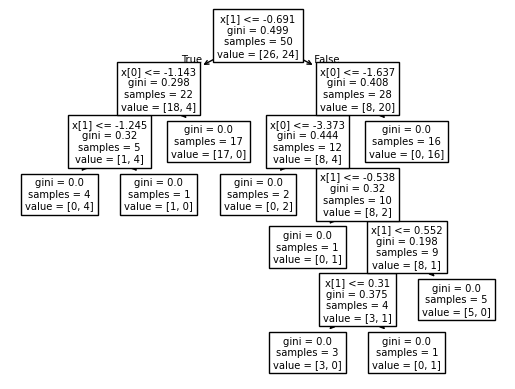

In [43]:
plot_tree(clf1)

[Text(0.578125, 0.9285714285714286, 'x[1] <= -0.001\ngini = 0.497\nsamples = 50\nvalue = [23, 27]'),
 Text(0.34375, 0.7857142857142857, 'x[0] <= -3.139\ngini = 0.32\nsamples = 25\nvalue = [20, 5]'),
 Text(0.4609375, 0.8571428571428572, 'True  '),
 Text(0.28125, 0.6428571428571429, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.40625, 0.6428571428571429, 'x[1] <= -0.26\ngini = 0.278\nsamples = 24\nvalue = [20, 4]'),
 Text(0.25, 0.5, 'x[1] <= -2.986\ngini = 0.188\nsamples = 19\nvalue = [17, 2]'),
 Text(0.125, 0.35714285714285715, 'x[1] <= -3.523\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.0625, 0.21428571428571427, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.1875, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.375, 0.35714285714285715, 'x[1] <= -0.58\ngini = 0.117\nsamples = 16\nvalue = [15, 1]'),
 Text(0.3125, 0.21428571428571427, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.4375, 0.21428571428571427, 'x[1] <= -0.515\ngini = 0.27

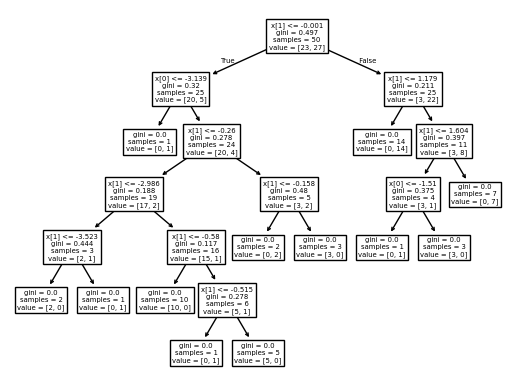

In [44]:
plot_tree(clf2)

[Text(0.42857142857142855, 0.9166666666666666, 'x[1] <= -0.358\ngini = 0.487\nsamples = 50\nvalue = [29.0, 21.0]'),
 Text(0.21428571428571427, 0.75, 'x[0] <= -1.44\ngini = 0.133\nsamples = 14\nvalue = [1, 13]'),
 Text(0.3214285714285714, 0.8333333333333333, 'True  '),
 Text(0.14285714285714285, 0.5833333333333334, 'x[0] <= -1.917\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.07142857142857142, 0.4166666666666667, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.21428571428571427, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2857142857142857, 0.5833333333333334, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.6428571428571429, 0.75, 'x[0] <= 0.173\ngini = 0.346\nsamples = 36\nvalue = [28, 8]'),
 Text(0.5357142857142857, 0.8333333333333333, '  False'),
 Text(0.42857142857142855, 0.5833333333333334, 'x[0] <= -0.302\ngini = 0.083\nsamples = 23\nvalue = [22, 1]'),
 Text(0.35714285714285715, 0.4166666666666667, 'gini = 0.0\nsamples = 19\nvalue = [1

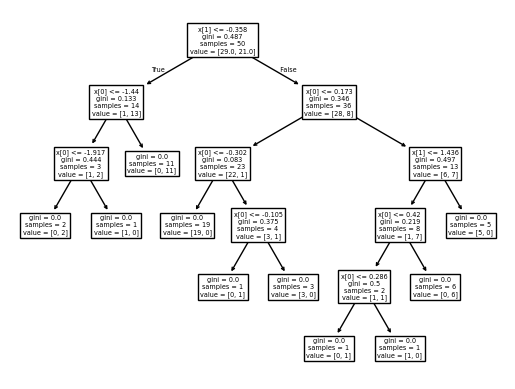

In [45]:
plot_tree(clf3)

In [46]:
clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [47]:
clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [48]:
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [49]:
df.sample(14,replace=True)

,col1,col2,col3,col4,col5,target
29,-1.673625,0.386142,-0.958442,-0.840891,-0.955924,0
45,-1.933941,2.103320,0.559441,-1.317646,-1.734341,0
60,1.262967,-2.316293,0.442422,-1.756277,-1.317507,1
58,0.650459,2.799965,-1.818276,-1.240181,0.997174,0
53,-2.501158,0.012056,-3.077613,-2.054429,-0.510970,0
73,-0.923356,1.641263,-0.791871,-0.748489,-1.119981,0
84,1.563838,-0.488110,4.415517,1.397081,-1.624279,1
79,-1.282415,1.961752,-1.565617,-1.227567,0.406511,0
39,-3.828521,-0.340172,-0.100377,-1.675554,-2.176830,0
37,1.198275,-1.115884,1.137850,-0.138509,-1.042656,1
